# Final Analysis
---

## Code to display our findings and outcomes


In [1]:
# Dependencies
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

In [2]:
# Create 2000-2019 dataframe
spotify_2000_2019_df = pd.read_csv("Resources/spotify_from_2000-2019.csv")

In [3]:
#Create Df of songs with popularity over 50
popular_df = pd.DataFrame(spotify_2000_2019_df.loc[spotify_2000_2019_df['popularity']>=50,:])

In [4]:
#Create Df of songs with popularity less than 10 and greater than 0
losers = pd.DataFrame(spotify_2000_2019_df.loc[(spotify_2000_2019_df["popularity"]< 10) & (spotify_2000_2019_df["popularity"] >= 0), :])

In [30]:
#Create DataFrame of songs from 1999-2009
early_df = pd.DataFrame(spotify_2000_2019_df.loc[spotify_2000_2019_df['year']<=2009,:])

In [31]:
#Create DataFrame of songs from 2010-2019
late_df = pd.DataFrame(spotify_2000_2019_df.loc[spotify_2000_2019_df['year']>2009,:])

## Statistical Testing

In [5]:
def scatterandhist(population, sample, label1, label2):
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label=label1)
    plt.scatter(range(len(sample)), sample, label=label2)
    plt.xlabel("Index")
    plt.ylabel("Popularity")
    plt.legend()
    
    
    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label=label1)
    plt.hist(sample, 20, density=True, alpha=0.7, label=label2)
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel("Popularity")
    plt.ylabel("Value Frequency (%)")
    plt.legend()  
    
    return population, sample

### Popular Songs

TtestResult(statistic=37.87451984175559, pvalue=1.876245645341364e-227, df=1680)

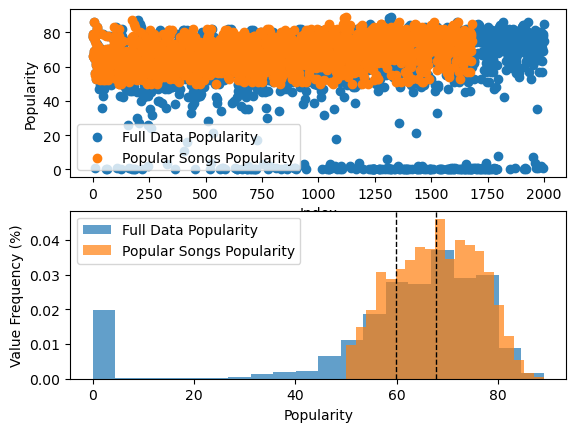

In [6]:
#Scatterplot and Histogram
popular_population, popular_sample = scatterandhist(spotify_2000_2019_df['popularity'],popular_df['popularity'], "Full Data Popularity", "Popular Songs Popularity")

#One Sample T-Test
stats.ttest_1samp(popular_sample, popular_population.mean())

### Unpopular Songs

TtestResult(statistic=-645.5848613873546, pvalue=2.5527473836321144e-303, df=179)

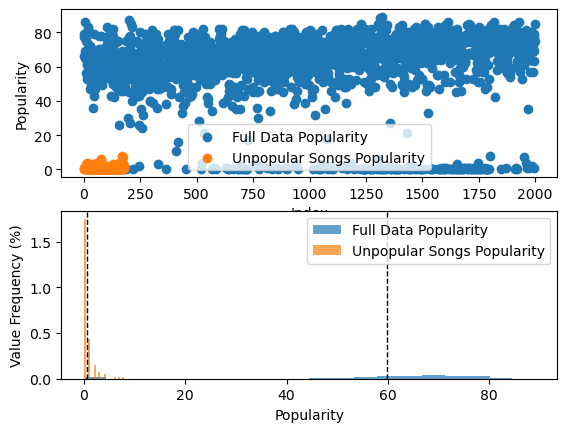

In [7]:
#Scatterplot and Histogram
losers_population, losers_sample = scatterandhist(spotify_2000_2019_df['popularity'],losers['popularity'], "Full Data Popularity", "Unpopular Songs Popularity")

#One Sample T-Test
stats.ttest_1samp(losers_sample, losers_population.mean())

## Significant Linear Regression

In [10]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values,x_loc,y_loc,x_label,y_label,title):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    

#### Energy vs Tempo

The r-squared is: 0.023629559623820157


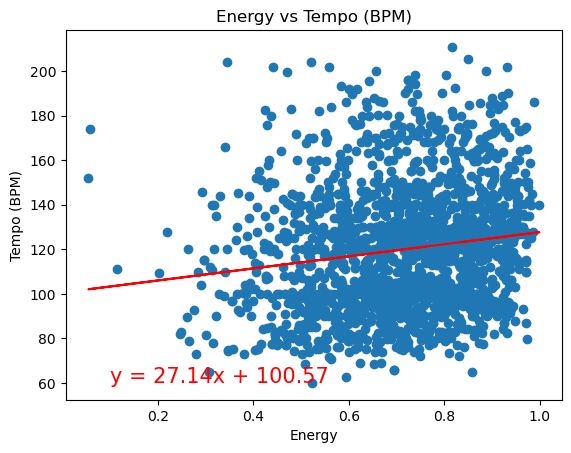

In [11]:
#Creating Scatterplot
linear_reg_plot(spotify_2000_2019_df['energy'],spotify_2000_2019_df['tempo'],0.1,60,"Energy","Tempo (BPM)", "Energy vs Tempo (BPM)")

#### Danceability vs Tempo

The r-squared is: 0.030073799289965224


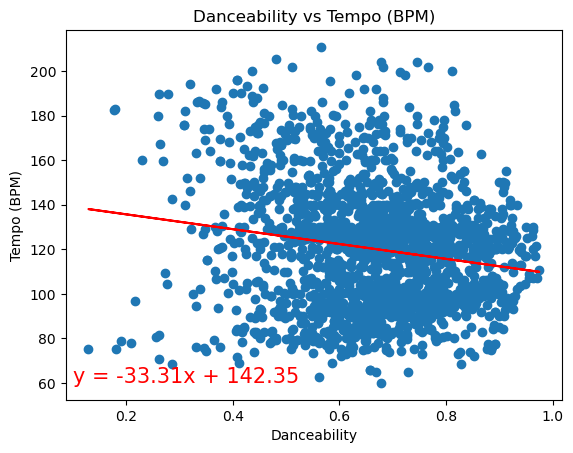

In [12]:
#Creating Scatterplot
linear_reg_plot(spotify_2000_2019_df['danceability'],spotify_2000_2019_df['tempo'],0.1,60,"Danceability","Tempo (BPM)", "Danceability vs Tempo (BPM)")

#### Energy vs Valence

The r-squared is: 0.11187314507553128


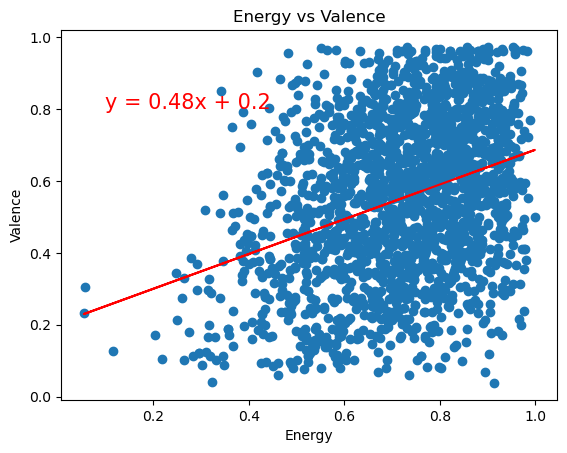

In [14]:
#Creating Scatterplot
linear_reg_plot(spotify_2000_2019_df['energy'],spotify_2000_2019_df['valence'],0.1,0.8,"Energy","Valence", "Energy vs Valence")

## Other Significant Statistics

### Music Keys to Popularity

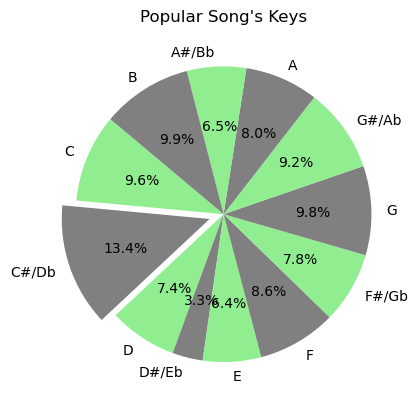

<Figure size 640x480 with 0 Axes>

In [15]:
#Labels for the keys because numbers are given
key_labels = ['C','C#/Db','D','D#/Eb','E',"F",'F#/Gb','G','G#/Ab','A','A#/Bb','B']

#Create pie chart values
values = [0,0,0,0,0,0,0,0,0,0,0,0]
for index,row in popular_df.iterrows():
    key = row['key']
    values[key]=values[key]+1

# The colors of each section of the pie chart
colors = ["lightgreen", "grey", "lightgreen", "grey","lightgreen", "grey","lightgreen", "grey","lightgreen", "grey","lightgreen", "grey",]

# Tells matplotlib to separate the "C#/Db" section from the others
explode = (0,0.1, 0, 0, 0,0,0,0,0,0,0,0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, explode = explode, colors = colors, labels=key_labels,autopct="%1.1f%%",startangle=140)
plt.title("Popular Song's Keys")
plt.show()
plt.savefig('Output/popular_keys_pie.png')

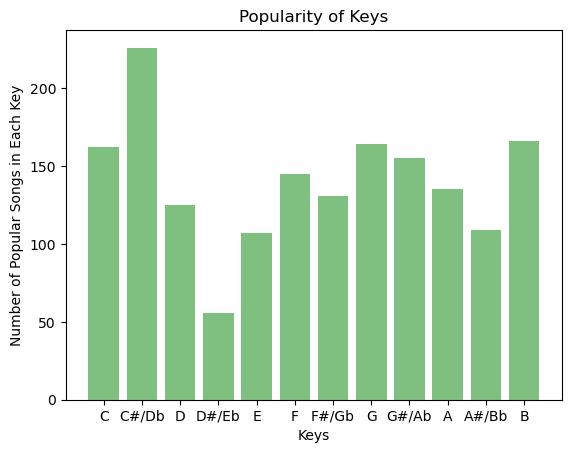

<Figure size 640x480 with 0 Axes>

In [16]:
# Create an array that contains the number of users each language has
x_axis = np.arange(len(values))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, values, color='green', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, key_labels)

# Give our chart some labels and a tile
plt.title("Popularity of Keys")
plt.xlabel("Keys")
plt.ylabel("Number of Popular Songs in Each Key")
plt.show()
plt.savefig('Output/popular_keys_bar.png')

### Genre Part 1 to Popularity

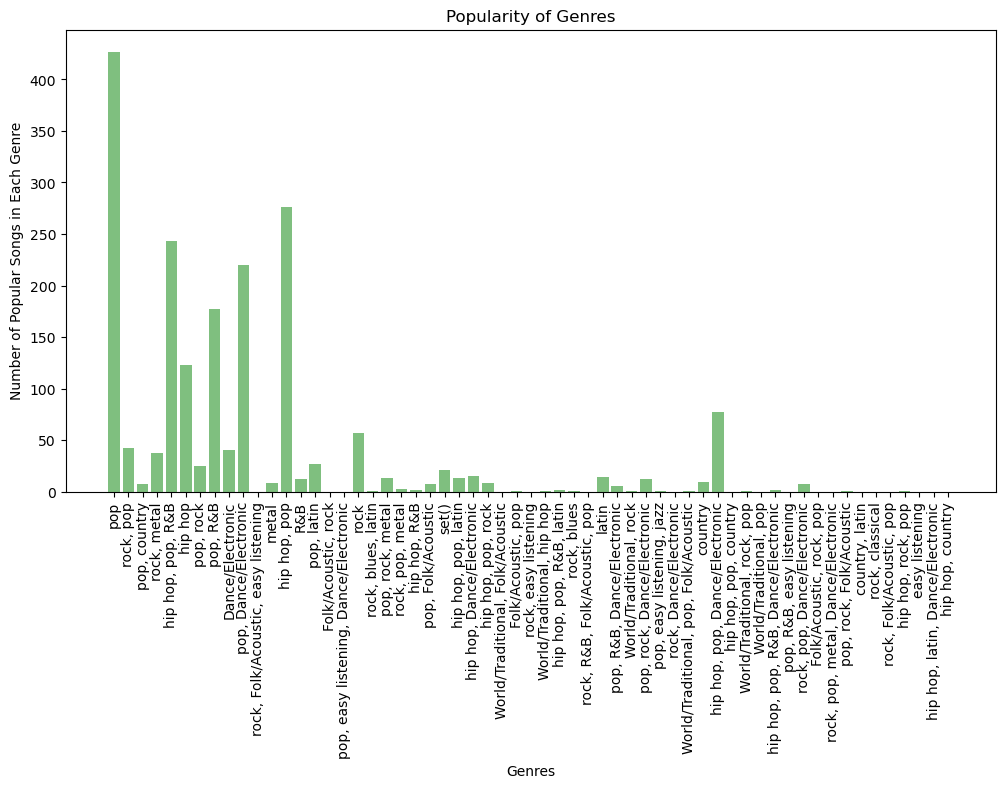

In [18]:
#initialize dictionary
genres_dict = {}

#Creating dictionary of genres related to number of times seen
#iterate through rows looking at genre
for index,row in spotify_2000_2019_df.iterrows():
    #look at genre
    genre = row['genre']
    
    #If the value dictionary contains the genre, increase the number
    if genre in genres_dict.keys():
        genres_dict[genre]=genres_dict[genre]+1
    
    #else add new dictionary entry
    else:
        genres_dict[genre] = 0

#create list of genre labels
genre_labels = genres_dict.keys()

#create list of values
values = []

for i in genres_dict.values():
    values.append(i)
    
# Create an array that contains the number of users each language has
x_axis = np.arange(len(values))

plt.figure(figsize=(12,6))
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, values, color='green', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genre_labels, rotation = 90)

# Give our chart some labels and a title

plt.title("Popularity of Genres")
plt.xlabel("Genres")
plt.ylabel("Number of Popular Songs in Each Genre")
plt.show()

### Genre Part 2 to Popularity

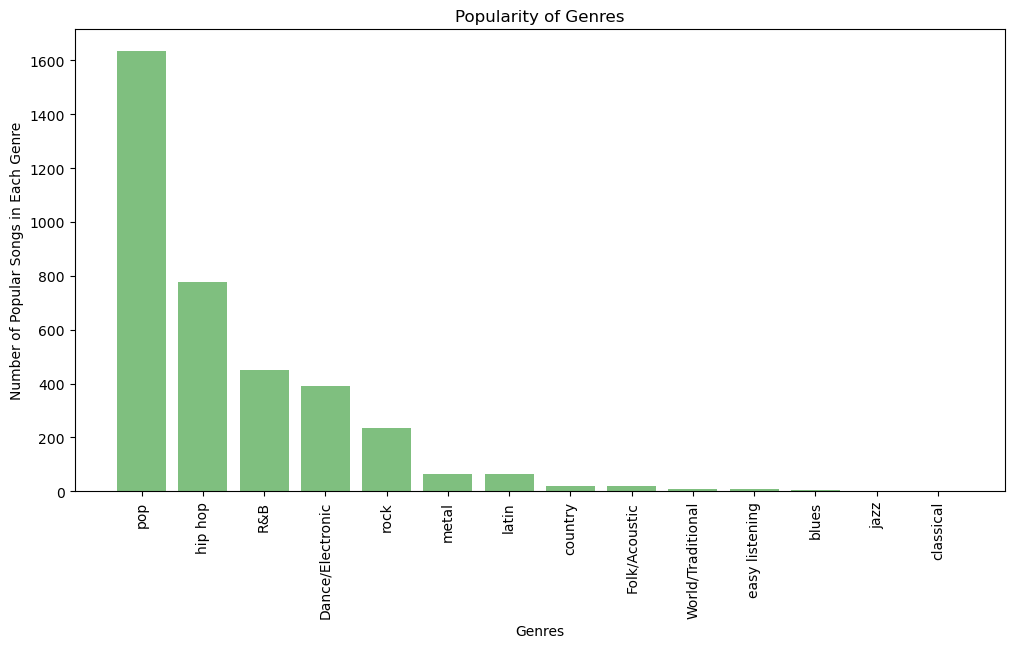

<Figure size 640x480 with 0 Axes>

In [22]:
#Create sorted list
genre_sorted_dict = dict(sorted(genres_dict.items(), key=lambda x: x[1], reverse=True))

#create list of genre labels
genre_sorted_labels = genre_sorted_dict.keys()

#create list of values
sorted_values = []

for i in genre_sorted_dict.values():
    sorted_values.append(i)

# Create an array that contains the number of users each language has
x_axis = np.arange(len(sorted_values))

plt.figure(figsize=(12,6))
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, sorted_values, color='green', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genre_sorted_labels, rotation = 90)

# Give our chart some labels and a title

plt.title("Popularity of Genres")
plt.xlabel("Genres")
plt.ylabel("Number of Popular Songs in Each Genre")
plt.show()
plt.savefig('Output/popular_genres_bar.png')

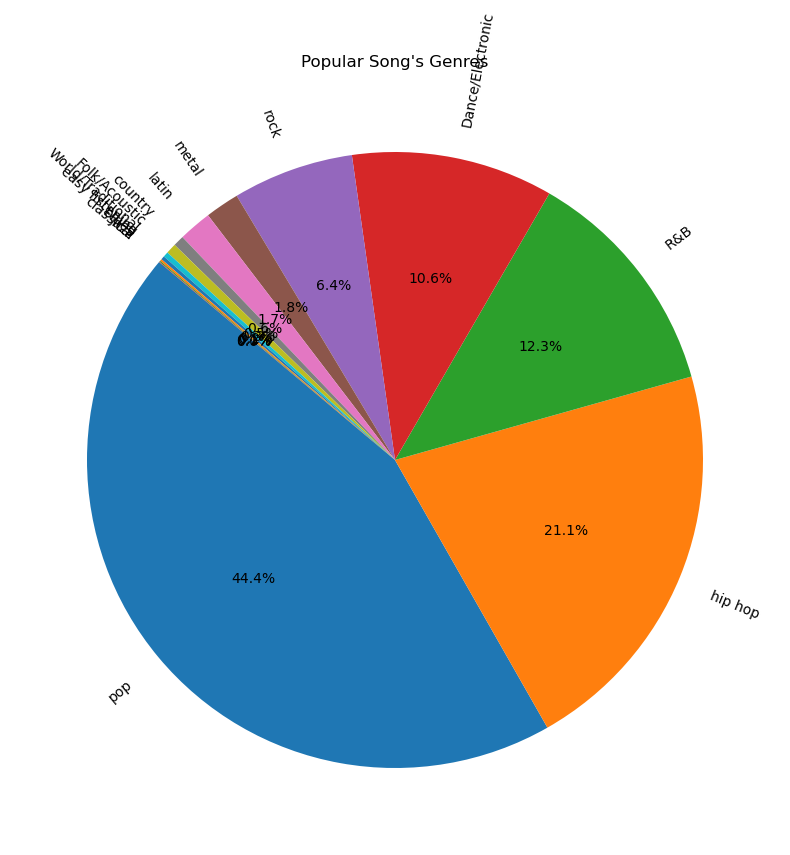

<Figure size 640x480 with 0 Axes>

In [23]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(10,10))
plt.pie(sorted_values, labels=genre_sorted_labels,autopct="%1.1f%%",startangle=140, rotatelabels = True)
plt.title("Popular Song's Genres")
plt.show()
plt.savefig('Output/popular_genres_pie.png')

### All Songs Explicit vs Not

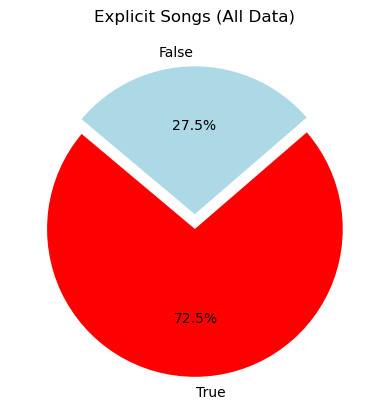

In [24]:
#Labels for the keys because numbers are given
labels = ["True", "False"]

#Create pie chart values
values = [0,0]
for index,row in spotify_2000_2019_df.iterrows():
    data = row['explicit']
    values[data]=values[data]+1
    
# The colors of each section of the pie chart
colors = ["red", "lightblue"]

# Explode part of the pie 
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, colors = colors, labels=labels, explode=explode, autopct="%1.1f%%", startangle=140)
plt.title("Explicit Songs (All Data)")
plt.show()

### Popular Songs Explicit vs Not

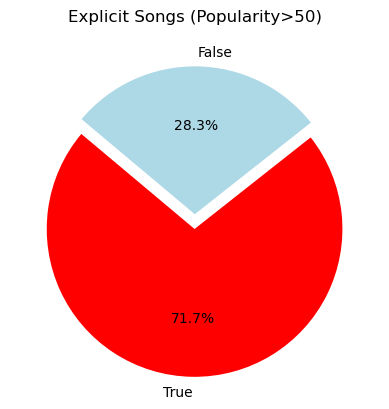

In [27]:
#Labels for the keys because numbers are given
labels = ["True", "False"]

#Create pie chart values
values = [0,0]
for index,row in popular_df.iterrows():
    data = row['explicit']
    values[data]=values[data]+1
    
# The colors of each section of the pie chart
colors = ["red", "lightblue"]

# Explode part of the pie 
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, colors = colors, labels=labels, explode=explode, autopct="%1.1f%%", startangle=140)
plt.title("Explicit Songs (Popularity>50)")
plt.show()

### Songs from 1999-2009 Explicit vs Not 

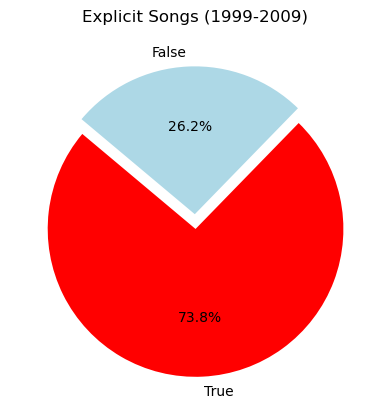

In [32]:
#Exploring explicit nature of the 1999-2009 dataset
#Labels for the keys because numbers are given
labels = ["True", "False"]

#Create pie chart values
values = [0,0]
for index,row in early_df.iterrows():
    data = row['explicit']
    values[data]=values[data]+1
    
# The colors of each section of the pie chart
colors = ["red", "lightblue"]

# Explode part of the pie 
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, colors = colors, labels=labels, explode=explode, autopct="%1.1f%%", startangle=140)
plt.title("Explicit Songs (1999-2009)")
plt.show()

### Songs from 2010-2019 Explicit vs Not

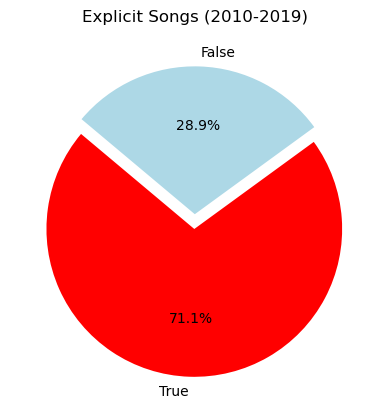

In [33]:
#Exploring explicit nature of the 2010-2019 dataset
#Labels for the keys because numbers are given
labels = ["True", "False"]

#Create pie chart values
values = [0,0]
for index,row in late_df.iterrows():
    data = row['explicit']
    values[data]=values[data]+1
    
# The colors of each section of the pie chart
colors = ["red", "lightblue"]

# Explode part of the pie 
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, colors = colors, labels=labels, explode=explode, autopct="%1.1f%%", startangle=140)
plt.title("Explicit Songs (2010-2019)")
plt.show()